# Life Expectancy - Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dataset/Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.shape

(2938, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.isna().sum() # Will fix them in the end

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df.rename({'Life expectancy ':'Life expectancy', 'Measles ':'Measles', ' BMI ': 'BMI', 
           'under-five deaths ':'under-five deaths', 'Diphtheria ':'Diphtheria', ' thinness  1-19 years': 'thinness 1-19 years',
          ' thinness 5-9 years':'thinness 5-9 years', ' HIV/AIDS':'HIV/AIDS'}, axis=1, inplace=True)

## Outlier detection

As given in the description that infant death and under-five-death are per 1000 population so max value seen in it are quite high and can be a sign of outliers

In [9]:
min_thres_infant, max_thres_infant = df['infant deaths'].quantile([0.1, 0.99])
min_thres_infant, max_thres_infant

(0.0, 495.0400000000009)

In [10]:
df[df['infant deaths'] > max_thres_infant] #These are not possible as infant death are per 1000 so remove these

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1186,India,2015,Developing,68.3,181.0,910,NaN,0.000000,87.0,90387,...,86.0,NaN,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7


In [11]:
min_thres_ufd, max_thres_ufd = df['under-five deaths'].quantile([0.1, 0.99])
min_thres_ufd, max_thres_ufd

(0.0, 767.8200000000015)

In [12]:
df[df['under-five deaths'] > max_thres_ufd]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1186,India,2015,Developing,68.3,181.0,910,NaN,0.000000,87.0,90387,...,86.0,NaN,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7


In [13]:
cols = ['infant deaths', 'under-five deaths']

Q1 = df[cols].quantile(0.15)
Q3 = df[cols].quantile(0.85)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
df['Country'].nunique()

186

In [15]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [16]:
# Since we have GDP, Population, Status, we will not be needing the country attribute as the rest will cover its importance.
df = df.drop('Country', axis=1)

In [17]:
# As Status is a binary column we can perform  one hot encoding to it.
status_column = pd.get_dummies(df['Status'])
df = pd.concat([df, status_column], axis=1)
df.drop('Status', axis=1, inplace=True)

In [18]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


## Data Visualization

<AxesSubplot:xlabel='Year', ylabel='Life expectancy'>

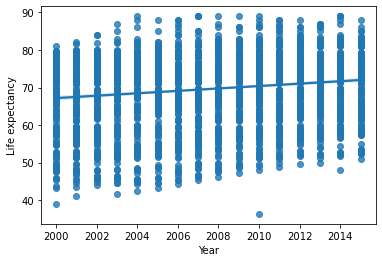

In [19]:
sns.regplot(x='Year', y='Life expectancy', data=df)

<AxesSubplot:xlabel='percentage expenditure', ylabel='Life expectancy'>

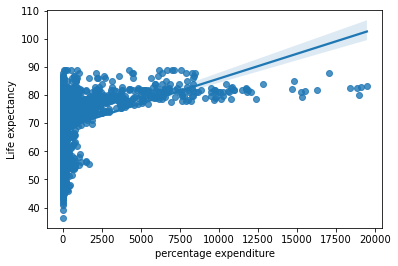

In [20]:
sns.regplot(x='percentage expenditure', y='Life expectancy', data=df)

<AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy'>

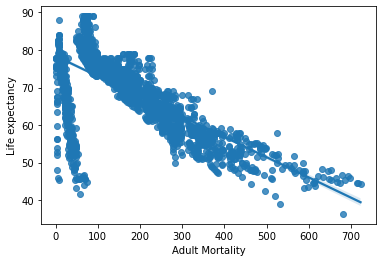

In [21]:
sns.regplot(x='Adult Mortality', y='Life expectancy', data=df)

In [22]:
df.columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

Trying to see if any relation exist between different disease

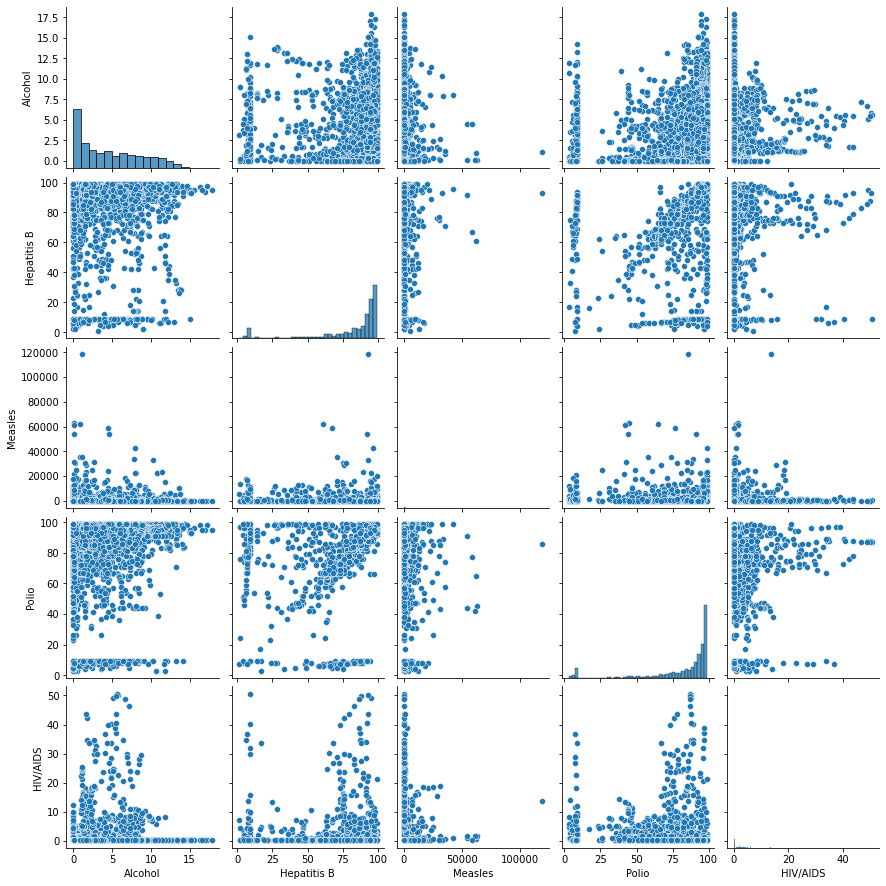

In [23]:
sns.pairplot(df[['Alcohol', 'Hepatitis B', 'Measles', 'Polio', 'HIV/AIDS']])

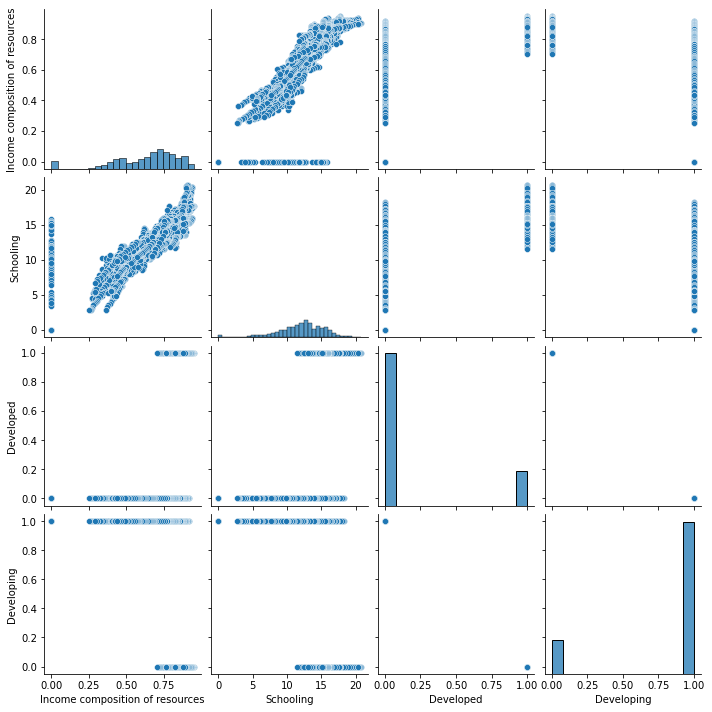

In [24]:
sns.pairplot(df[['Income composition of resources', 'Schooling', 'Developed', 'Developing']])

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy'>

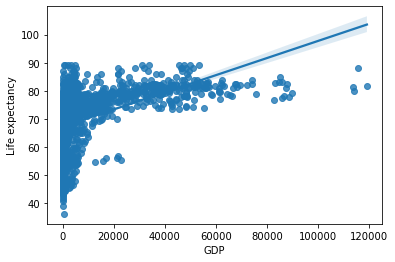

In [25]:
sns.regplot(x='GDP', y='Life expectancy', data=df)

<AxesSubplot:xlabel='Population', ylabel='Life expectancy'>

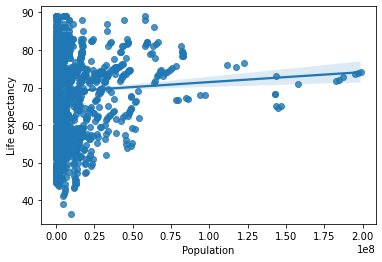

In [26]:
sns.regplot(x='Population', y='Life expectancy', data=df)

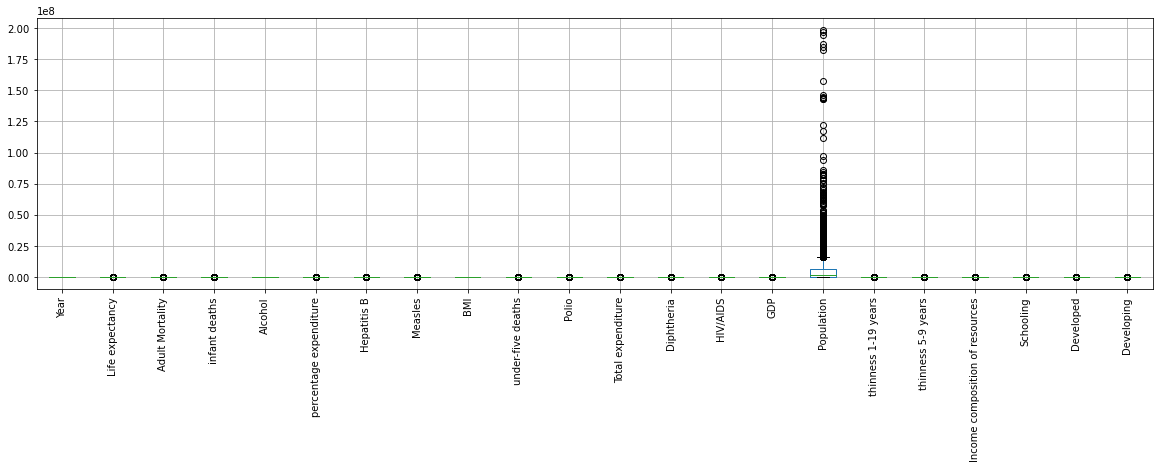

In [27]:
plt.figure(figsize = (20,5))
df.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [28]:
# we can observe maximum outlier in 'Population' column.
df.drop(['Population'], axis=1, inplace=True)

In [29]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,0,1


Drawing bell curves to analysise the data

In [30]:
from scipy.stats import norm

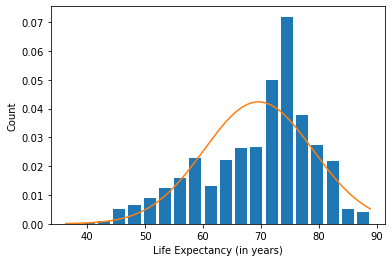

In [31]:
plt.hist(df['Life expectancy'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Life Expectancy (in years)')
plt.ylabel('Count')

rng = np.arange(df['Life expectancy'].min(), df['Life expectancy'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['Life expectancy'].mean(), df['Life expectancy'].std()))

In [32]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
count,2797.000000,2787.000000,2787.000000,2797.000000,2610.000000,2797.000000,2281.000000,2797.000000,2763.000000,2797.000000,...,2578.000000,2778.000000,2797.000000,2370.000000,2763.000000,2763.000000,2651.000000,2655.000000,2797.000000,2797.000000
mean,2007.558455,69.598672,162.933979,12.501609,4.702130,773.239425,81.754494,1077.804076,39.396743,17.736861,...,6.040613,83.229302,1.726314,7808.125783,4.546797,4.581904,0.633197,12.121092,0.183053,0.816947
std,4.608713,9.424594,123.650992,19.960702,4.063479,2031.106272,24.621437,4767.384216,19.906834,29.563481,...,2.501840,23.208353,5.157952,14548.947884,3.889112,3.953802,0.211645,3.343240,0.386779,0.386779
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,63.650000,73.000000,0.000000,0.970000,5.103249,78.000000,0.000000,21.300000,0.000000,...,4.370000,81.000000,0.100000,478.945512,1.500000,1.500000,0.498000,10.300000,0.000000,1.000000
50%,2008.000000,72.400000,142.000000,3.000000,3.910000,72.800121,92.000000,11.000000,45.200000,3.000000,...,5.860000,93.000000,0.100000,1932.490330,3.300000,3.300000,0.686000,12.500000,0.000000,1.000000
75%,2012.000000,76.000000,226.000000,16.000000,7.827500,473.123812,97.000000,230.000000,56.500000,21.000000,...,7.600000,97.000000,0.700000,6514.176755,7.000000,7.000000,0.784000,14.400000,0.000000,1.000000
max,2015.000000,89.000000,723.000000,104.000000,17.870000,19479.911610,99.000000,118712.000000,87.300000,152.000000,...,17.600000,99.000000,50.600000,119172.741800,19.900000,19.900000,0.948000,20.700000,1.000000,1.000000


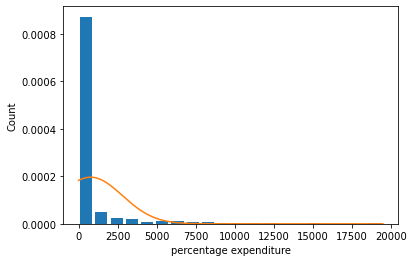

In [33]:
plt.hist(df['percentage expenditure'], bins=20, rwidth=0.8, density=True)
plt.xlabel('percentage expenditure')
plt.ylabel('Count')

rng = np.arange(df['percentage expenditure'].min(), df['percentage expenditure'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['percentage expenditure'].mean(), df['percentage expenditure'].std()))

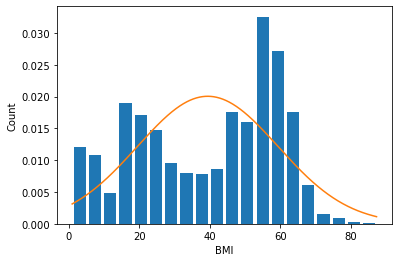

In [34]:
plt.hist(df['BMI'], bins=20, rwidth=0.8, density=True)
plt.xlabel('BMI')
plt.ylabel('Count')

rng = np.arange(df['BMI'].min(), df['BMI'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['BMI'].mean(), df['BMI'].std()))

In [35]:
df.dropna(inplace=True)

In [36]:
df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [37]:
df.shape

(1767, 21)

<AxesSubplot:>

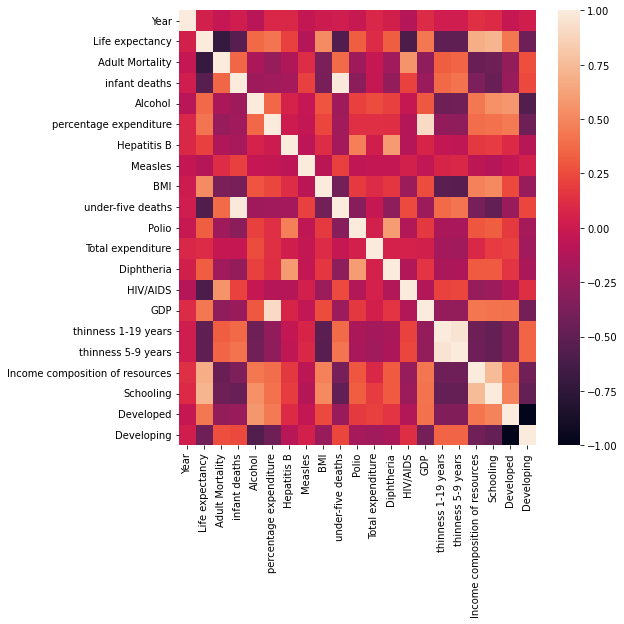

In [38]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr())

Here we can see that year is not related to any attribute. Life expectancy is more dependent on features like: developing, Schooling, income, thiness, HIV, under-five-death, BMI, percentage expendeture, Alcohol, adult mortality,  

In [39]:
df.to_csv('../dataset/final_life_expectancy.csv', index=False)